<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">

<h1 align=center><font size = 5>Linear regression 1-D: Training  One Parameter </font></h1> 

In this lab, you will train a model with Pytorch by using data that you created. The model will only have one parameter: the slope.

# Table of Contents
You will review how to make a prediction in several different ways by using Pytorch. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function (total loss) </a></li>
<li><a href="#ref2">Train the Model </a></li>
<li><a href="#ref3">Practice Questions  </a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>

You'll need the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The class <code>PlotStuff</code> helps you visualize the data space and the parameter space during training and has nothing to do with Pytorch.

In [2]:
class PlotStuff():
    def __init__(self,X,Y,w,start,stop,go=False):
        start=w.data
        self.error=[]
        self.parameter=[]
        self.X=X.numpy()
        self.Y=Y.numpy()
        self.parameter_values=torch.arange(start,stop)
        self.Loss_function=[criterion(forward(X),Y) for w.data in self.parameter_values] 
        w.data=start
    def __call__(self,Yhat,w,error,n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X,Yhat.detach().numpy())
        plt.plot(self.X,self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20,20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration "+str(n))
        plt.plot(self.parameter_values.numpy(),self.Loss_function)   
        plt.plot(self.parameter,self.error,'ro')
        plt.xlabel("B")
        
        plt.figure()
    def __del__(self):
        plt.close('all')

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Import Pytorch:

In [3]:
import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will  to estimate.

In [4]:
X=torch.arange(-3,3,0.1).view(-1, 1)
f=-3*X

Plot the line:

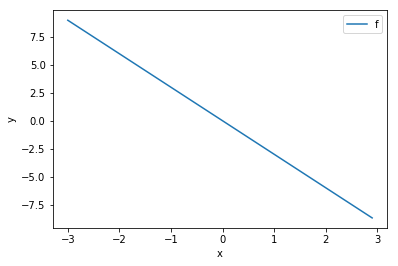

In [5]:
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Add some noise to the data: 

In [6]:
Y=f+0.1*torch.randn(X.size())

Plot the results: 

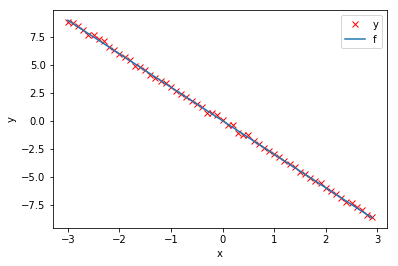

In [7]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='y')
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<a id="ref1"></a>
<h2 align=center>Create the Model and Cost Function (total loss) </h2>

Define the forward function: 

In [8]:
def forward(x):
    return w*x

Define the cost or criterion function: 

In [9]:
def criterion(yhat,y):
    
    return torch.mean((yhat-y)**2)

Define the learning rate <code>lr</code> and an empty list LOSS to record the loss for each iteration:   

In [10]:
lr=0.1
LOSS=[]

Create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it:

In [11]:
w=torch.tensor(-10.0,requires_grad=True)

Create a <code>PlotStuff</code> object to visualize the data space and the parameter space during training:

In [12]:
gradient_plot =PlotStuff(X,Y,w,start=-10,stop=5)

<a id="ref2"></a>
<h2> Train the Model</h2>

Run 4 iterations of gradient descent:  

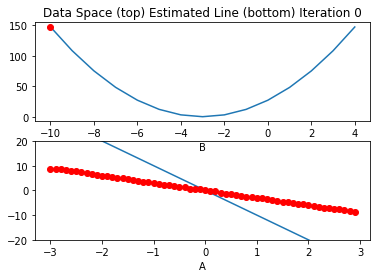

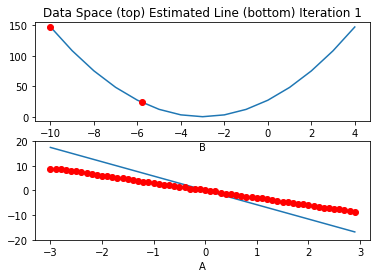

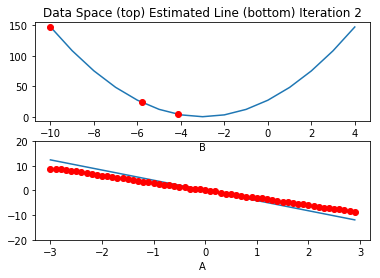

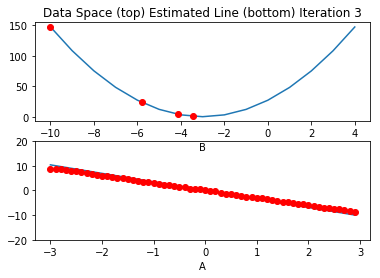

<Figure size 432x288 with 0 Axes>

In [13]:
for epoch in range(4):
    #make a prediction 
    Yhat=forward(X)
    #just for ploting 
    gradient_plot(Yhat,w,criterion(Yhat,Y).item(),epoch)
    #calculate the loss 
    loss=criterion(Yhat,Y)
    #store the total loss in a list 
    LOSS.append(loss)
    #Backward pass: compute gradient of the loss with respect #Backward pass: compute gradient of the loss with respect to all the learnable parameters parameters
    loss.backward()
    #updata parameters
    w.data=w.data-lr*w.grad.data
    # zero the gradients before running the backward pass
    w.grad.data.zero_()

Plot the loss for each iteration: 

Text(24,0.5,'Cost')

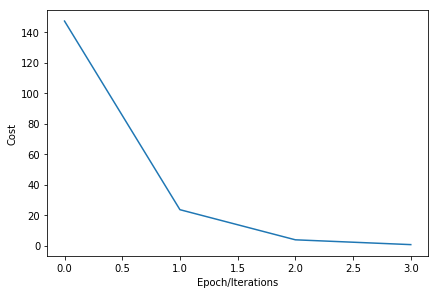

In [14]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<a id="ref3"></a>
<h2>Practice Questions</h2>

#### Create a new learnable parameter <code>w</code> with an initial value of -15.0.

In [15]:
w=torch.tensor(-15.0,requires_grad=True)

Double-click __here__ for the solution.
<!-- Your answer is below:
w=torch.tensor(-15.0,requires_grad=True)
-->

#### Create an empty  list <code>LOSS2</code>:

In [16]:
LOSS2 = []

Double-click __here__ for the solution.
<!-- Your answer is below:
LOSS2=[]
-->

#### Learn the parameters by using the tensor <code>X</code>,<code>Y</code> and the function <code>criterion</code> and then store the loss values in the list <code>LOSS2</code> for 4 epochs. 

In [18]:
for epoch in range(4):
    #make a prediction 
    Yhat=forward(X)
    #just for ploting 
    #gradient_plot(Yhat,w,criterion(Yhat,Y).item(),epoch)
    #calculate the loss 
    loss=criterion(Yhat,Y)
    #store the total loss in a list 
    LOSS2.append(loss)
    #Backward pass: compute gradient of the loss with respect #Backward pass: compute gradient of the loss with respect to all the learnable parameters parameters
    loss.backward()
    #updata parameters
    w.data=w.data-lr*w.grad.data
    # zero the gradients before running the backward pass
    w.grad.data.zero_()

Double-click __here__ for the solution.

<!-- Your answer is below:
for epoch in range(4):
    Yhat=forward(X)
    #calculate the loss 
    loss=criterion(Yhat,Y)
    #store the loss in a list 
    LOSS2.append(loss)
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    #updata parameters
    w.data=w.data-lr*w.grad.data
    # zero the gradients before running the backward pass
    w.grad.data.zero_()
    -->

#### Plot an overlay of the list <code>LOSS2</code> and <code>LOSS</code>. 

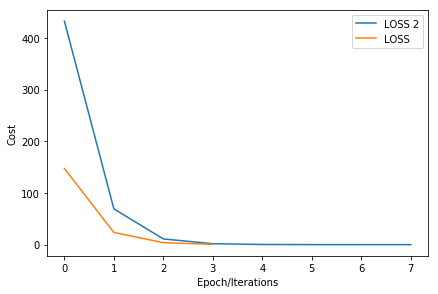

In [19]:
plt.plot(LOSS2,label="LOSS 2")
plt.plot(LOSS,label="LOSS")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

Double-click __here__ for the solution.

<!-- Your answer is below:
plt.plot(LOSS2,label="LOSS 2")
plt.plot(LOSS,label="LOSS")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()
    -->

#### What does this tell you about the parameter value 

Double-click __here__ for the solution.

<!-- Your answer is below:
the parameter value is sensitive to initialization  
    -->

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working fo

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/)  

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).